In [ ]:
import pandas as pd
import seaborn as sns



df=pd.read_csv("/content/uber.csv")
df.head()



df.isnull().sum()



df=df.dropna()




df.isnull().sum()




df['pickup_datetime']=pd.to_datetime(df['pickup_datetime'])
df.loc[:,'hour']=df['pickup_datetime'].dt.hour
df.loc[:,'day']=df['pickup_datetime'].dt.day
df.loc[:,'month']=df['pickup_datetime'].dt.month
df




df=df.drop(["pickup_datetime","key"],axis=1)
df = pd.get_dummies(df, drop_first=True)
df.head()





df.describe()




sns.boxplot(df["fare_amount"])
plt.show()




import numpy as np
from scipy.stats import zscore
z_score=np.abs(zscore(df['fare_amount']))



df=df[(z_score<3)]



df.describe()




sns.boxplot(df['fare_amount'])



corr_matrix=df.corr()
sns.heatmap(corr_matrix,cmap='coolwarm',annot=True)




X=df.drop(['fare_amount'],axis=1)
y=df['fare_amount']




from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=158)




from sklearn.linear_model import LinearRegression
my_model=LinearRegression()
result=my_model.fit(X_test,y_test)



prediction=result.predict(X_test)
prediction





from sklearn.metrics import r2_score
r2_score(y_test,prediction)





from sklearn.metrics import root_mean_squared_error
root_mean_squared_error(y_test,prediction)




from sklearn.ensemble import RandomForestRegressor
my_model1=RandomForestRegressor()
result1=my_model1.fit(X_test,y_test)




predictions=result1.predict(X_test)
predictions





from sklearn.metrics import r2_score
r2_score(y_test,predictions)





from sklearn.metrics import root_mean_squared_error
root_mean_squared_error(y_test,predictions)




result1.predict([[24238194,-73.999817,40.738354,-73.999512,40.723217,1.0,19,7,5]])





result.predict([[24238194,-73.999817,40.738354,-73.999512,40.723217,1.0,19,7,5]])



In [ ]:
import pandas as pd
import seaborn as sns

In [ ]:
df=pd.read_csv("/content/uber.csv")

In [ ]:
df.head()

,Unnamed: 0,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,24238194,2015-05-07 19:52:06.0000003,7.5,2015-05-07 19:52:06 UTC,-73.999817,40.738354,-73.999512,40.723217,1.0
1,27835199,2009-07-17 20:04:56.0000002,7.7,2009-07-17 20:04:56 UTC,-73.994355,40.728225,-73.994710,40.750325,1.0
2,44984355,2009-08-24 21:45:00.00000061,12.9,2009-08-24 21:45:00 UTC,-74.005043,40.740770,-73.962565,40.772647,1.0
3,25894730,2009-06-26 08:22:21.0000001,5.3,2009-06-26 08:22:21 UTC,-73.976124,40.790844,-73.965316,40.803349,3.0
4,17610152,2014-08-28 17:47:00.000000188,16.0,2014-08-28 17:47:00 UTC,-73.925023,40.744085,-73.973082,40.761247,5.0


In [ ]:
df.isnull().sum()

,0
Unnamed: 0,0
key,0
fare_amount,0
pickup_datetime,0
pickup_longitude,1
pickup_latitude,1
dropoff_longitude,1
dropoff_latitude,1
passenger_count,1


In [ ]:
df=df.dropna()

In [ ]:
df.isnull().sum()

,0
Unnamed: 0,0
key,0
fare_amount,0
pickup_datetime,0
pickup_longitude,0
pickup_latitude,0
dropoff_longitude,0
dropoff_latitude,0
passenger_count,0


In [ ]:
df['pickup_datetime']=pd.to_datetime(df['pickup_datetime'])

In [ ]:
df.loc[:,'hour']=df['pickup_datetime'].dt.hour
df.loc[:,'day']=df['pickup_datetime'].dt.day
df.loc[:,'month']=df['pickup_datetime'].dt.month

In [ ]:
df

,Unnamed: 0,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,hour,day,month
0,24238194,2015-05-07 19:52:06.0000003,7.5,2015-05-07 19:52:06+00:00,-73.999817,40.738354,-73.999512,40.723217,1.0,19,7,5
1,27835199,2009-07-17 20:04:56.0000002,7.7,2009-07-17 20:04:56+00:00,-73.994355,40.728225,-73.994710,40.750325,1.0,20,17,7
2,44984355,2009-08-24 21:45:00.00000061,12.9,2009-08-24 21:45:00+00:00,-74.005043,40.740770,-73.962565,40.772647,1.0,21,24,8
3,25894730,2009-06-26 08:22:21.0000001,5.3,2009-06-26 08:22:21+00:00,-73.976124,40.790844,-73.965316,40.803349,3.0,8,26,6
4,17610152,2014-08-28 17:47:00.000000188,16.0,2014-08-28 17:47:00+00:00,-73.925023,40.744085,-73.973082,40.761247,5.0,17,28,8
...,...,...,...,...,...,...,...,...,...,...,...,...
44641,2443771,2012-10-05 10:51:16.0000001,14.0,2012-10-05 10:51:16+00:00,-74.014536,40.709428,-73.986400,40.722371,2.0,10,5,10
44642,50510956,2012-11-16 18:27:26.0000002,5.5,2012-11-16 18:27:26+00:00,-73.996408,40.723795,-73.995142,40.732524,1.0,18,16,11
44643,18896098,2013-11-10 00:01:31.0000006,18.5,2013-11-10 00:01:31+00:00,-73.993699,40.721556,-73.963605,40.774466,1.0,0,10,11
44644,8271708,2009-08-02 09:15:00.00000011,4.1,2009-08-02 09:15:00+00:00,-73.984837,40.745212,-73.978265,40.753503,1.0,9,2,8


In [ ]:
df=df.drop(["pickup_datetime","key"],axis=1)

In [ ]:
df = pd.get_dummies(df, drop_first=True)

In [ ]:
df.head()

,Unnamed: 0,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,hour,day,month
0,24238194,7.5,-73.999817,40.738354,-73.999512,40.723217,1.0,19,7,5
1,27835199,7.7,-73.994355,40.728225,-73.994710,40.750325,1.0,20,17,7
2,44984355,12.9,-74.005043,40.740770,-73.962565,40.772647,1.0,21,24,8
3,25894730,5.3,-73.976124,40.790844,-73.965316,40.803349,3.0,8,26,6
4,17610152,16.0,-73.925023,40.744085,-73.973082,40.761247,5.0,17,28,8


In [ ]:
df.describe()

,Unnamed: 0,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,hour,day,month
count,4.464600e+04,44646.000000,44646.000000,44646.000000,44646.000000,44646.000000,44646.000000,44646.000000,44646.000000,44646.000000
mean,2.769153e+07,11.400171,-72.566735,39.951296,-72.587712,39.955902,1.678627,13.472584,15.677149,6.262622
std,1.603611e+07,10.081187,10.756469,5.995164,10.667100,5.980302,1.295952,6.529353,8.695790,3.434965
min,4.800000e+01,0.000000,-748.016667,-74.015515,-737.916665,-74.008745,0.000000,0.000000,1.000000,1.000000
25%,1.374844e+07,6.000000,-73.992111,40.734764,-73.991485,40.733700,1.000000,9.000000,8.000000,3.000000
50%,2.765892e+07,8.500000,-73.981854,40.752527,-73.980132,40.752906,1.000000,14.000000,16.000000,6.000000
75%,4.153255e+07,12.500000,-73.967164,40.767136,-73.963706,40.768169,2.000000,19.000000,23.000000,9.000000
max,5.542169e+07,350.000000,40.774042,45.031653,40.828377,45.031598,6.000000,23.000000,31.000000,12.000000


<Axes: ylabel='fare_amount'>

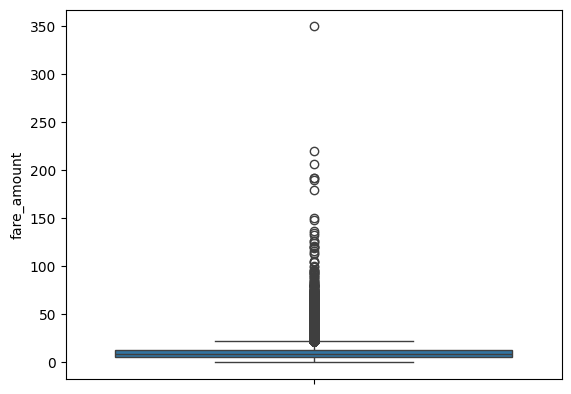

In [ ]:
sns.boxplot(df["fare_amount"])
plt.show()

In [40]:
import numpy as np
from scipy.stats import zscore

In [41]:
z_score=np.abs(zscore(df['fare_amount']))

In [42]:
df=df[(z_score<3)]

In [43]:
df.describe()

,Unnamed: 0,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,hour,day,month
count,4.343700e+04,43437.000000,43437.000000,43437.000000,43437.000000,43437.000000,43437.000000,43437.000000,43437.000000,43437.00000
mean,2.769591e+07,10.192609,-72.603211,39.972852,-72.627258,39.979342,1.677188,13.470498,15.676842,6.25575
std,1.603432e+07,6.441798,10.650533,5.904300,10.545997,5.882313,1.295784,6.548257,8.693877,3.43789
min,4.800000e+01,0.000000,-748.016667,-74.015515,-737.916665,-74.003887,0.000000,0.000000,1.000000,1.00000
25%,1.375420e+07,6.000000,-73.992235,40.735502,-73.991500,40.734560,1.000000,9.000000,8.000000,3.00000
50%,2.766941e+07,8.100000,-73.982037,40.752853,-73.980310,40.753242,1.000000,14.000000,16.000000,6.00000
75%,4.152254e+07,12.100000,-73.967950,40.767268,-73.964570,40.768281,2.000000,19.000000,23.000000,9.00000
max,5.542169e+07,41.540000,40.774042,45.031653,40.828377,45.031598,6.000000,23.000000,31.000000,12.00000


<Axes: ylabel='fare_amount'>

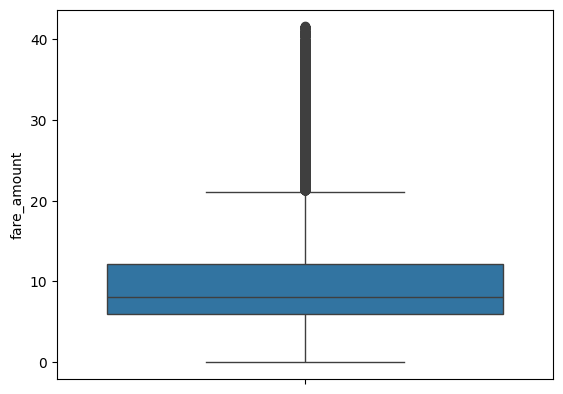

In [44]:
sns.boxplot(df['fare_amount'])

In [45]:
corr_matrix=df.corr()

<Axes: >

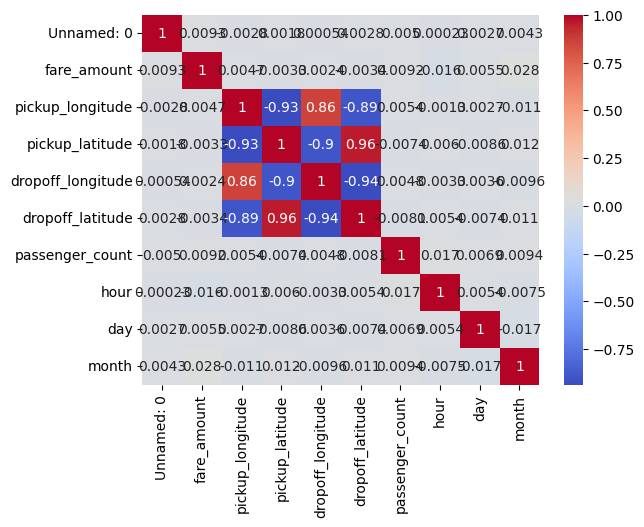

In [46]:
sns.heatmap(corr_matrix,cmap='coolwarm',annot=True)

In [47]:
X=df.drop(['fare_amount'],axis=1)
y=df['fare_amount']

In [48]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=158)

In [49]:
from sklearn.linear_model import LinearRegression
my_model=LinearRegression()
result=my_model.fit(X_test,y_test)

In [50]:
prediction=result.predict(X_test)

In [52]:
prediction

array([10.62882921, 10.66818907, 10.45630186, ..., 10.56007832,
       10.73455733, 10.44997389])

In [53]:
from sklearn.metrics import r2_score
r2_score(y_test,prediction)

0.0028657150974782386

In [54]:
from sklearn.metrics import root_mean_squared_error
root_mean_squared_error(y_test,prediction)

6.58410632652648

In [55]:
from sklearn.ensemble import RandomForestRegressor
my_model1=RandomForestRegressor()
result1=my_model1.fit(X_test,y_test)

In [56]:
predictions=result1.predict(X_test)

In [57]:
predictions

array([16.457,  4.977, 12.903, ..., 11.657,  6.857, 12.763])

In [58]:
from sklearn.metrics import r2_score
r2_score(y_test,predictions)

0.9668252013525582

In [59]:
from sklearn.metrics import root_mean_squared_error
root_mean_squared_error(y_test,predictions)

1.200947877541183

In [62]:
result1.predict([[24238194,-73.999817,40.738354,-73.999512,40.723217,1.0,19,7,5]])

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


array([7.454])

In [63]:
result.predict([[24238194,-73.999817,40.738354,-73.999512,40.723217,1.0,19,7,5]])

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([10.01619464])